In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as t
import numpy as np
from tqdm import tqdm

In [107]:
column0 = 'IID'
column1 = 'income'
column2 = 'income_lic'
column3 = 'employee_num'
column4 = 'taxes'
column5 = 'salary'
df = pd.read_csv('fns_for_model.csv', delimiter=';')
    
df[column4] = df["taxesProfit"] + df["taxesVAT"] + df["taxesEmplSal"]
df[column5] = df['fot'] / df[column3]

In [108]:
def HHI(year, quarter, column):
    idx = 0
    #df1 = df[(df['year'] == year) & (df['quarter'] == quarter) & (df['isIT'] == 0)]
    df1 = df[(df['year'] == year) & (df['quarter'] == quarter)]
    sum = df1[column].sum()
    for i in df1[column0]:
        idx += (df1.loc[(df1[column0] == i), column].item() / sum * 100) ** 2
    return idx

In [109]:
def correct_format(value, index):
    if value == 1:
        return '{:0.0f}'.format(2019)
    if value == 5:
        return '{:0.0f}'.format(2020)
    if value == 9:
        return '{:0.0f}'.format(2021)
    
correct_format = t.FuncFormatter(correct_format)

In [110]:
def XY(column):
    x = [i for i in range(1, 12)]
    y = []
    for i in range(2019, 2022):
        for j in range(1, 5):
            if j == 4 and i == 2021:
                break
            y.append(HHI(i, j, column))
    return (x, y)

x_income, y_income = XY(column1)
#x_lic, y_lic = XY(column2)

In [111]:
def plot_constructor_quarter(x, y):
    
    figure, ax1= plt.subplots()
    ax1.set_ylabel('HHI', rotation='horizontal')
    ax1.set_xlabel('T')
    ax1.yaxis.set_label_coords(0.015, 1.015)
    ax1.xaxis.set_label_coords(1.025, -0.01)
    ax1.set_xticks([i for i in range(1, 12)])
    ax1.xaxis.set_major_formatter(correct_format)
    
    ax1.plot(x, y, color='blue', markersize=3.)
    ax1.grid()
    plt.xlim(xmin=1)
    plt.ylim(ymin=0, ymax=120)
    plt.show()

    return figure

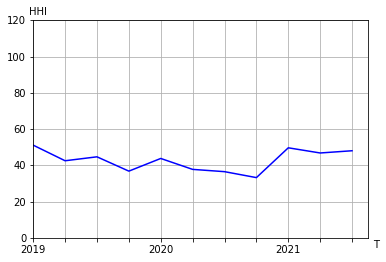

In [112]:
figure = plot_constructor_quarter(x_income, y_income)
figure.savefig('./HHI/hhi-income.png', format='png')
figure.savefig('./HHI/hhi-income.eps', format='eps')

#figure = plot_constructor_quarter(x_lic, y_lic)
#figure.savefig('./HHI/hhi-not-ac-income_lic.png', format='png')
#figure.savefig('./HHI/hhi-not-ac-income_lic.eps', format='eps')

In [113]:
def HHI_year(year, column):
    idx = 0
    #df1 = df[(df['year'] == year) & (df['isIT'] == 0)]
    df1 = df[(df['year'] == year)]
    sum = df1[column].sum()
    previous = -1
    for i in tqdm(df1[column0]):
        if previous == i:
            continue
        df_dummy = df1[(df1[column0] == i)]
        quarters_sum = df_dummy[column].sum()
        idx += (quarters_sum / sum * 100) ** 2
        previous = i
    return idx

In [114]:
def XY_year(column):
    x = [2019, 2020, 2021]
    y = []
    for i in x:
        y.append(HHI_year(i, column))
    return (x, y)

x_income_year, y_income_year = XY_year(column1)
#x_income_lic_year, y_income_lic_year = XY_year(column2)

100%|██████████| 108416/108416 [00:13<00:00, 8167.72it/s]


In [115]:
def plot_constructor_year(x, y):
    
    figure, ax1= plt.subplots()
    ax1.set_ylabel('HHI', rotation='horizontal')
    ax1.set_xlabel('T')
    ax1.yaxis.set_label_coords(0.015, 1.015)
    ax1.xaxis.set_label_coords(1.025, -0.01)
    ax1.set_xticks([2019, 2020, 2021])
    ax1.plot(x, y, color='blue', markersize=3.)
    ax1.grid()
    plt.xlim(xmin=x[0])
    plt.ylim(ymin=0, ymax=120)
    plt.show()

    return figure

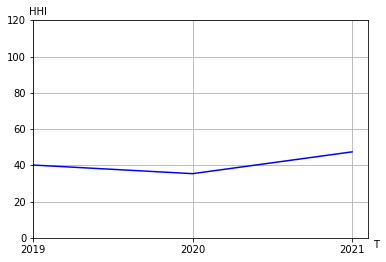

In [116]:
figure = plot_constructor_year(x_income_year, y_income_year)
figure.savefig('./HHI/hhi-income-Y.png', format='png')
figure.savefig('./HHI/hhi-income-Y.eps', format='eps')

#figure = plot_constructor_year(x_income_lic_year, y_income_lic_year)
#figure.savefig('./HHI/hhi-not-ac-income_lic-Y.png', format='png')
#figure.savefig('./HHI/hhi-not-ac-income_lic-Y.eps', format='eps')